In [25]:
import pandas as pd
import pickle
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

# Load Datasets
print("Loading datasets...")
Xs = pickle.load(open('binarized_xs.pkl', 'rb'))
ys = pickle.load(open('binarized_ys.pkl', 'rb'))
print("Done.")

Loading datasets...
Done.


In [26]:
# Setup alphas list for BernoulliNB parameter
alphas = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4,10**5,10**6,10**7]

# Setup data structures to hold train, test results
train_jll = np.zeros((10, 15))
test_jll = np.zeros((10, 15))

In [27]:
for i in range(0,10):
    idx = 0
    # Split datasets
    x_train, x_test, y_train, y_test = train_test_split(Xs[i], ys[i], test_size=1./3, random_state=7000)
    for j in alphas:
        # 1. Create new Bernoulli Naive Bayes model using alpha value
        mod = BernoulliNB(alpha=j)
        
        # Fit the model to the training set
        mod.fit(x_train,y_train)
        
        # Compute the joint log likelihood for the training set, store it train_jll 2d array
        total_res = mod._joint_log_likelihood(x_train)
        y_train_binary = y_train*1
        
        entry_val = 0
        # Sum-up by matching true labels 
        for k in range(0,len(y_train)):
            entry_val += total_res[k][y_train_binary[k]]
            
        # Store result 
        train_jll[i][idx] = entry_val
        
        # 2. Compute the joint log likelihood for the testing set, store it test_jll 2d array
        
        total_res = mod._joint_log_likelihood(x_test)
        y_test_binary = y_test*1
        
        entry_val = 0
        # Sum-up by matching true labels 
        for k in range(0,len(y_test)):
            entry_val += total_res[k][y_test_binary[k]]
            
        test_jll[i][idx] = entry_val
        
        idx += 1

In [45]:
train_jll[0]

array([-230.75872338, -230.75872518, -230.75874318, -230.75892318,
       -230.76072326, -230.77873044, -230.95943337, -232.81600595,
       -250.93716448, -309.65302051, -337.65431703, -341.55294925,
       -341.95831433, -341.99901231, -342.00308373])

In [38]:
test_jll[0]

array([-146.2453248 , -146.24532427, -146.24531903, -146.24526657,
       -146.24474208, -146.23950874, -146.18831105, -145.77795049,
       -146.13302242, -159.51728609, -168.05695685, -169.30864379,
       -169.43955681, -169.45270811, -169.45402384])

In [46]:
train_jll[1]

array([-30521.94500529, -30521.94501609, -30521.94512409, -30521.94620415,
       -30521.9570096 , -30522.06555266, -30523.19752504, -30537.75728391,
       -30772.12085327, -33672.85167338, -44640.46851842, -50535.07883045,
       -51385.41383415, -51474.22736759, -51483.14822976])

In [47]:
test_jll[1]

array([-15298.47888266, -15286.96595729, -15275.45303286, -15263.94011776,
       -15252.42730159, -15240.91603058, -15229.47274255, -15222.13522513,
       -15326.61042615, -16794.21070488, -22309.90882267, -25266.52363627,
       -25692.81046897, -25737.33136898, -25741.80323568])

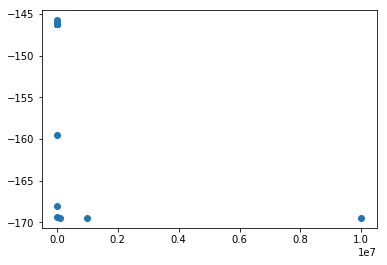

In [59]:
import matplotlib.pyplot as plt
#plt.xlim((10**-7, 1000))
plt.scatter(alphas,test_jll[0])

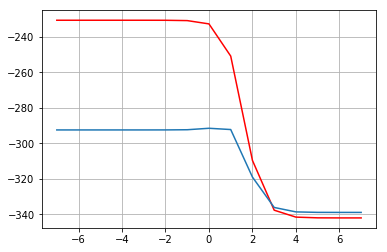

In [44]:
alphas = np.arange(15)
alphas = -7 + alphas

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(alphas, train_jll[0],'r')
ax.plot(alphas, 2*test_jll[0])
ax.grid()
#fig.savefig("train.png")
plt.show()

In [3]:
i = 1
j = 10**-7
x_train, x_test, y_train, y_test = train_test_split(Xs[i], ys[i], test_size=1./3, random_state=7000)
mod = BernoulliNB(alpha=j)
mod.fit(x_train,y_train)

BernoulliNB(alpha=1e-07, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
mod.class_count_

array([593., 605.])

In [36]:
test = mod._joint_log_likelihood(x_train)
test

array([[-26.24647877, -28.00049448],
       [-34.33118547, -28.37155644],
       [-36.21588723, -33.31546751],
       ...,
       [-27.39189935, -25.33331189],
       [-25.99084541, -27.67481259],
       [-20.44545541, -23.11895269]])

In [37]:
y_train=y_train*1
y_train

array([0, 1, 1, ..., 0, 0, 0])

In [39]:
test

array([[-26.24647877, -28.00049448],
       [-34.33118547, -28.37155644],
       [-36.21588723, -33.31546751],
       ...,
       [-27.39189935, -25.33331189],
       [-25.99084541, -27.67481259],
       [-20.44545541, -23.11895269]])

In [40]:
sum = 0
for i in range(0,len(y_train)):
    sum += test[i][y_train[i]]

In [41]:
sum

-30521.945005292135